In [0]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys

# 1. Reminder Python, NumPy

Python + NumPy: http://cs231n.github.io/python-numpy-tutorial/

Python: https://gist.github.com/kenjyco/69eeb503125035f21a9d#file-learning-python3-ipynb

NumPy: https://docs.scipy.org/doc/numpy-1.13.0/reference/

# 2. Rețele Neuronale

## 2.1 Exemplu de Început

### 2.1.1 Reprezentarea Datelor

Fie următorul set de date de forma $x \in \mathbb{R}^n, x = (x_1, x_2, \dots, x_n)$. Un exemplu ar fi estimarea prețului unei locuințe în funcție de trăsăturile ei: suprafața utilă ($x_1$), numărul de camere ($x_2$), numărul de băi ($x_3$), distanța de cea mai apropiată stație de metrou ($x_4$) etc. *

Notație: $x^{(i)}$ "eșantionul" $i$ (eng. "sample") din setul de date, $1 \leq i \leq m$, $m$ dimensiunea setului de date. În cazul particular de mai jos, $m = 4, n = 3$.

În cazul unui algoritm de învățare supervizată, învățarea necesită și un set de valori "etichete" (eng. "labels") asociate fiecărui eșantion, $y \in \mathbb{R}^k$, deobicei $k = 1$. În cazul regresiei, $y$ reprezintă una sau mai multe valori reale ce se aproximează. În cazul algoritmilor de clasificare, $y$ poate reprezenta indexul unei clase (e.g. "câine", "pisică", "mașină"). În astfel de cazuri, deseori se alege o reprezentare one-hot:

$y = 2$ ("avion"),    $onehot(y) = (0, 1, 0, 0, 0)^T$

$y = 5$ ("tractor"),    $onehot(y) = (0, 0, 0, 0, 1)^T$

$y = 1$ ("mașină"),   $onehot(y) = (1, 0, 0, 0, 0)^T$

...

$y = k$,    $onehot(y) = I_{*k}$, unde $I_{*k}$ reprezintă coloana $k$ a matricei identitate

În cazul particular de mai jos, $y \in \{0, 1\}$ este o clasă binară (0 sau 1, "True" sau "False" etc.).

\* există și cazuri în care o parte din date sunt categorice; more on this later

In [0]:
X = np.array([
    [0,0,1],
    [0,1,1],
    [1,0,1],
    [1,1,1],
])
y = np.array([
    [0],
    [0],
    [1],
    [1],
])

### 2.1.2 Funcții Neliniare. Funcții de Activare. Derivate.

In [0]:
def plot_function(func, func_d=None, name=None, definition=None, definition_d=None, start=-10.0, stop=10.0, figsize=(10, 5)):
  """
  Ploteaza orice functie. Utilizare de baza: plot_function(func).
  Argumente:
    func: functia care trebuie plotata
    func_d: derivata functiei
    name: titlul plot-ului
    definition: definitia matematica a functiei (in LaTeX)
    definition_d: definitia matematica a derivatei (in LaTeX)
    start: de unde sa inceapa intervalul pe care este aplicata functia
    stop: unde sa se opreasca intervalul pe care este aplicata functia
    figsize: dimensiunea plot-ului
  """
  x = np.linspace(start, stop, 10000)
  fig = plt.figure(figsize=figsize)
  plt.plot(x, func(x), label=definition)
  if func_d != None:
    plt.plot(x, func_d(x), label=definition_d)
  plt.xlim([start, stop])
  plt.title(name, pad=20, fontsize=24)
  plt.legend(fontsize=20)
  plt.show()

În analiză matematică, o funcție $f : \mathbb{R}^n \rightarrow \mathbb{R}$, $f(x_1, x_2, ..., x_n) = y$, se numește liniară dacă $\exists\;a_0, a_1, ..., a_n$ astfel încât $f(x) = a_0 + a_1 \cdot x_1 + a_2 \cdot x_2 + ... + a_n \cdot x_n$ i.e. funcția formează un hiperplan. 

De exemplu, pentru $n = 1$, o funcție liniară este orice funcție de forma $f(x) = a \cdot x + b$ i.e. orice dreaptă.  

La baza rețelelor neuronale stau funcțiile neliniare derivabile, adică cele care nu îndeplinesc condiția de mai sus. Câteva exemple:

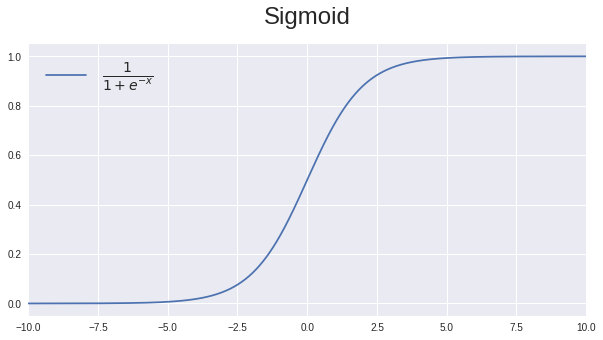

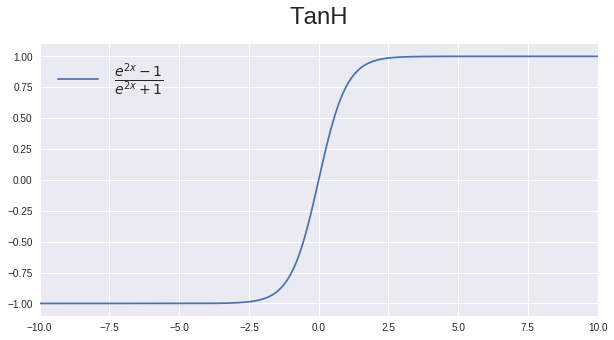

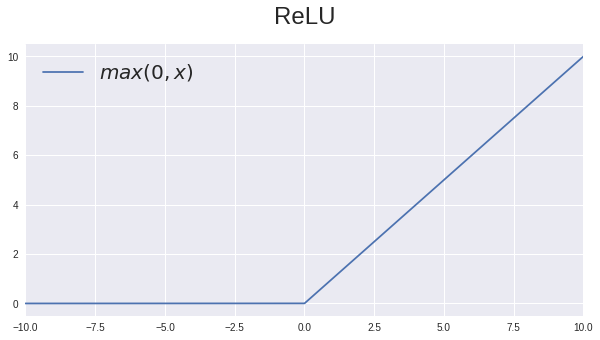

In [0]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def tanh(x):
  return (np.exp(2*x) - 1) / (np.exp(2*x) + 1)

def relu(x):
  return np.maximum(0, x)

plot_function(sigmoid, name="Sigmoid", definition=r"$\frac{1}{1 + e^{-x}}$")
plot_function(tanh, name="TanH", definition=r"$\frac{e^{2x} - 1}{e^{2x} + 1}$")
plot_function(relu, name="ReLU", definition=r"$max(0, x)$")

În vederea utilizării lor în rețele neuronale ca "funcții de activare", acestea trebuie să fie derivabile. Din fericire, funcțiile de mai sus sunt derivabile. Pentru ReLU se folosește o convenție, deoarece nu este derivabilă în 0. 

In [0]:
def sigmoid_d(x):
  ### TODO: implementare derivata sigmoidei aici
  return np.exp(-x) / (1 + np.exp(-x))**2

def tanh_d(x):
  ### TODO: implementare derivata tangentei hiperbolice aici
  return 4*np.exp(2*x) / (np.exp(2*x) + 1)**2

def relu_d(x):
  # Prin conventie, derivata ReLU se ia 0 pentru x <= 0 si 1 altfel
  x_ = np.array(x, copy=True)
  x_[x <= 0] = 0
  x_[x > 0] = 1
  return x_

O reprezentare a funcțiilor de mai sus în plan cu derivatele lor:

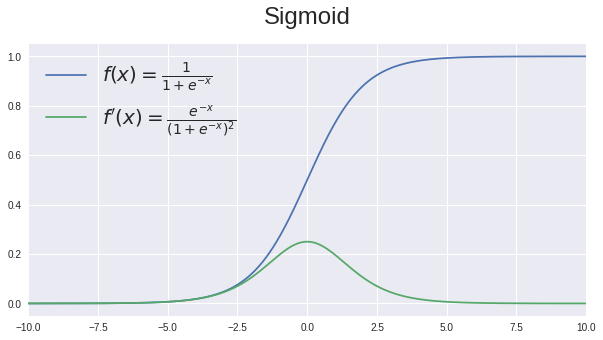

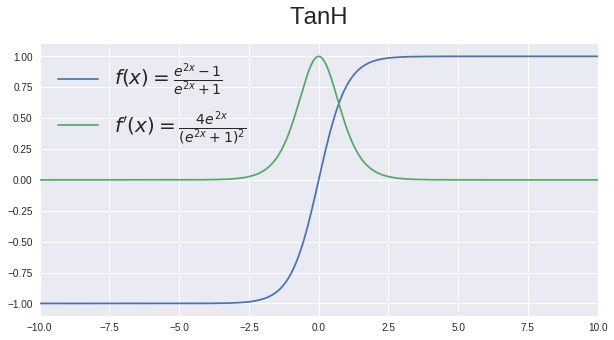

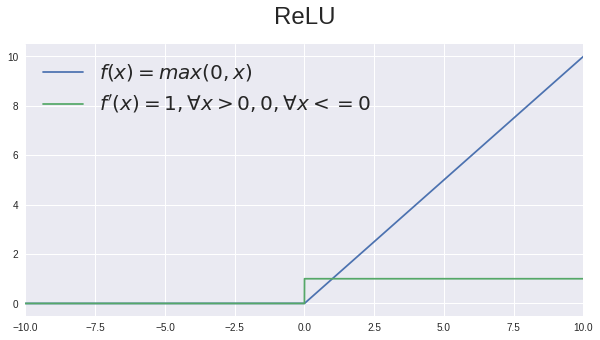

In [0]:
plot_function(sigmoid, sigmoid_d, name="Sigmoid", definition=r"$f(x) = \frac{1}{1 + e^{-x}}$", definition_d=r"$f'(x) = \frac{e^{-x}}{(1 + e^{-x})^2}$")
plot_function(tanh, tanh_d, name="TanH", definition=r"$f(x) = \frac{e^{2x} - 1}{e^{2x} + 1}$", definition_d=r"$f'(x) = \frac{4e^{2x}}{(e^{2x} + 1)^2}$")
plot_function(relu, relu_d, name="ReLU", definition=r"$f(x) = max(0, x)$", definition_d=r"$f'(x) = 1, \forall x > 0, 0, \forall x <= 0$")

### 2.1.3 Antrenare/Optimizare

Se pleacă de la o valoare aleatoare pentru ponderile rețelei,  se calculează pe baza lor rezultatul rețelei, se calculează funcția de cost și, în final, se actualizează, iterativ, ponderile cu valori mai apropiate de cele optime conform gradienților acestora față de funcția de cost. Acest proces se repetă până când algoritmul nu mai converge sau timp de un număr pre-stabilit de pași.

În continuare, vom considera o rețea neuronală cu un singur strat de 1 "neuron" (eng. "neuron" sau "unit"), care va reprezenta și rezultatul rețelei. Acest tip de rețea neuronală se numește Perceptron și constituie punctul din care s-a dezvoltat ulterior conceptul. 

Având în vedere dimensiunea datelor de intrare ($n = 3$), va fi nevoie de $3 \times 1$ ponderi (pentru fiecare combinație posibilă de trăsătură de intrare și neuron din strat). Ponderile se generează, inițial, aleator. Le vom reprezenta matricial:

In [0]:
# Pentru a asigura consistenta intre rulari
np.random.seed(42)
np.set_printoptions(suppress=True)

# Matricea de ponderi
W1 = np.random.normal(0, 0.1, size=(3, 1))

print("W1:\n", W1)

W1:
 [[ 0.04967142]
 [-0.01382643]
 [ 0.06476885]]


Vom folosi funcția sigmoidă ca funcție de activare. Rețeaua va calcula, deci: $\hat{y} = \sigma(X \cdot W)$. 

Mai concret, produsul arată în felul următor:

$
\begin{bmatrix}
  x^{(1)}_1 & x^{(1)}_2 & x^{(1)}_3 \\ 
  x^{(2)}_1 & x^{(2)}_2 & x^{(2)}_3 \\
  \cdots & \cdots & \cdots \\
  x^{(m)}_1 & x^{(m)}_2 & x^{(m)}_3
\end{bmatrix} \cdot
$
$
\begin{bmatrix}
  W_{1,1} \\
  W_{2,1} \\
  W_{3,1}
\end{bmatrix} =
$
$
\begin{bmatrix}
  x^{(1)}_1 \cdot W_{1,1} + x^{(1)}_2 \cdot W_{2,1} + x^{(1)}_3 \cdot W_{3,1} \\
  x^{(2)}_1 \cdot W_{1,1} + x^{(2)}_2 \cdot W_{2,1} + x^{(2)}_3 \cdot W_{3,1} \\
  \cdots \\
  x^{(m)}_1 \cdot W_{1,1} + x^{(m)}_2 \cdot W_{2,1} + x^{(m)}_3 \cdot W_{3,1} \\
\end{bmatrix} =
$
$
\begin{bmatrix}
  z^{(1)}\\
  z^{(2)} \\
  \cdots \\
  z^{(m)} \\
\end{bmatrix}
$

Iar rezultatul final este doar aplicarea non-liniarității peste rezultatul înmulțirii matriciale:

$
\begin{bmatrix}
  \hat{y}^{(1)} \\
  \hat{y}^{(2)} \\
  \cdots \\
  \hat{y}^{(m)}
\end{bmatrix} =
$
$
\begin{bmatrix}
  \sigma(z^{(1)}) \\
  \sigma(z^{(2)}) \\
  \cdots \\
  \sigma(z^{(m)})
\end{bmatrix}
$

Antrenarea se poate face pe oricâte exemple, nu este nevoie de întreg setul de date de fiecare dată. Se poate lua chiar $m = 1$: 

$
\begin{bmatrix}
  x_1 & x_2 & x_3
\end{bmatrix}
\cdot
\begin{bmatrix}
  W_{1,1} \\
  W_{2,1} \\
  W_{3,1}
\end{bmatrix}
= x_1 \cdot W_{1,1} + x_2 \cdot W_{2,1} + x_3 \cdot W_{3,1} = z
$

$\hat{y} = \sigma(z) = \sigma(x_1 \cdot W_{1,1} + x_2 \cdot W_{2,1} + x_3 \cdot W_{3,1})$

În acest caz particular în care valorile așteptate $y$ sunt clase binare, funcția sigmoidală se poate considera că reprezintă o măsură a certitudinii apartenenței unui eșantion $x \in \mathbb{R}^n$ la una din cele două clase ($1 - \hat{y}$ reprezentând certitudinea că $x$ aparține celeilalte clase).

Pentru a actualiza ponderile cu valori mai apropiate de cele optime, se măsoară mai întâi o funcție de cost de valorile așteptate ($y$) și cele aproximate de rețea ($\hat{y}$). Am optat pentru cross-entropy aplicat pe caz binar: $L(y, \hat{y}) = \frac{1}{m} \sum_{i = 1}^{m} -y^{(i)} \cdot ln(\hat{y}^{(i)}) - (1 - y^{(i)}) \cdot ln(1 - \hat{y}^{(i)})$. Se dorește ca valoarea acestei funcții să fie cât mai mică. Pentru actualizarea propriu-zisă a ponderilor, se folosește gradientul funcției de cost la pondere ca, informal, o măsură a efectului pe care l-a avut ponderea în divergența rezultatului de la răspunsul real/așteptat:

$W_{1,1} \leftarrow W_{1,1} - \cfrac{\partial L(y^{(i)}, \hat{y}^{(i)})}{\partial W_{1,1}}$, pentru $i = \overline{1, \dots, m}$, pe rând.

Știind că derivata sigmoidei poate fi exprimată ca $\cfrac{d \sigma(z^{(i)})}{d z^{(i)}} = \sigma(z^{(i)})(1 - \sigma(z^{(i)}))$

$
\cfrac{\partial L(y^{(i)}, \hat{y}^{(i)})}{\partial W_{1,1}} = 
\cfrac{\partial L(y^{(i)}, \hat{y}^{(i)})}{\partial \hat{y}^{(i)}} \cdot 
  \cfrac{\partial \hat{y}^{(i)}}{\partial z^{(i)}} \cdot
  \cfrac{\partial z^{(i)}}{\partial W_{1,1}} \\
\cfrac{\partial L(y^{(i)}, \hat{y}^{(i)})}{\partial W_{1,1}} =
\cfrac{1}{m} \cdot \left(- \cfrac{y^{(i)}}{\hat{y}^{(i)}} + \cfrac{1 - y^{(i)}}{1 - \hat{y}^{(i)}}\right) \cdot (\sigma(z^{(i)}) \cdot (1 - \sigma(z^{(i)}))) \cdot x^{(i)}_1
$

not. $\delta^{(i)} := - \cfrac{y^{(i)}}{\hat{y}^{(i)}} + \cfrac{1 - y^{(i)}}{1 - \hat{y}^{(i)}}, i = \overline{1, \dots, m}$

$W_{1,1} \leftarrow W_{1,1} - \cfrac{1}{m} \cdot \delta^{(i)} \cdot (\sigma(z^{(i)}) \cdot (1 - \sigma(z^{(i)}))) \cdot x^{(i)}_1$

Analog $W_{2,1}$ și $W_{3,1}$:

$W_{2,1} \leftarrow W_{2,1} - \cfrac{1}{m} \cdot  \delta^{(i)} \cdot (\sigma(z^{(i)}) \cdot (1 - \sigma(z^{(i)}))) \cdot x^{(i)}_2$

$W_{3,1} \leftarrow W_{3,1} - \cfrac{1}{m} \cdot  \delta^{(i)} \cdot (\sigma(z^{(i)}) \cdot (1 - \sigma(z^{(i)}))) \cdot x^{(i)}_3$

Acumulând modificările pentru toate eșantioanele, actualizarea parametrilor la o iterație a algoritmului arată în felul următor:

$W_{k,1} \leftarrow W_{k,1} - \cfrac{1}{m} \displaystyle\sum\limits_{i=1}^{m} \delta^{(i)} \cdot (\sigma(z^{(i)}) \cdot (1 - \sigma(z^{(i)}))) \cdot x^{(i)}_k, k = \overline{1, 3}$

În formă matricială, aceste derivate se pot exprima (cu puțin abuz de notație) astfel încât rezultatul să fie identic:

$
\nabla_W =
\begin{bmatrix}
  \frac{1}{m} \sum\limits_{i=1}^{m} \delta^{(i)} \cdot (\sigma(z^{(i)}) \cdot (1 - \sigma(z^{(i)}))) \cdot x^{(i)}_1 \\
  \frac{1}{m} \sum\limits_{i=1}^{m} \delta^{(i)} \cdot (\sigma(z^{(i)}) \cdot (1 - \sigma(z^{(i)}))) \cdot x^{(i)}_2 \\
  \frac{1}{m} \sum\limits_{i=1}^{m} \delta^{(i)} \cdot (\sigma(z^{(i)}) \cdot (1 - \sigma(z^{(i)}))) \cdot x^{(i)}_3 \\
\end{bmatrix}
$

$
\nabla_W = 
\begin{bmatrix}
  x^{(1)}_1 & x^{(2)}_1 & \cdots & x^{(m)}_1 \\ 
  x^{(1)}_2 & x^{(2)}_2 & \cdots & x^{(m)}_2 \\
  x^{(1)}_3 & x^{(2)}_3 & \cdots & x^{(m)}_3 
\end{bmatrix}
\cdot
\begin{bmatrix}
  \frac{1}{m} \cdot \delta^{(1)} \cdot (\sigma(z^{(1)}) \cdot (1 - \sigma(z^{(1)})) \\
  \frac{1}{m} \cdot \delta^{(2)} \cdot (\sigma(z^{(2)}) \cdot (1 - \sigma(z^{(2)})) \\
  \cdots \\
  \frac{1}{m} \cdot \delta^{(m)} \cdot (\sigma(z^{(m)}) \cdot (1 - \sigma(z^{(m)})) \\
\end{bmatrix}
$

$\nabla_W = \cfrac{1}{m} \cdot X^T \cdot (\nabla_{\hat{y}} \odot \nabla_z)$, unde $\odot$ înseamnă înmulțire element cu element, iar

$
\nabla_{\hat{y}} =
\begin{bmatrix}
  \delta^{(1)} \\
  \delta^{(2)} \\
  \cdots \\
  \delta^{(m)}
\end{bmatrix}
$

$
\nabla_{z} =
\begin{bmatrix}
  \frac{d \sigma(z^{(1)})}{d(z^{(1)})} \\
  \frac{d \sigma(z^{(2)})}{d(z^{(2)})} \\
  \cdots \\
  \frac{d \sigma(z^{(m)})}{d(z^{(m)})} \\
\end{bmatrix}
=
\begin{bmatrix}
  \sigma(z^{(1)})(1 - \sigma(z^{(1)})) \\
  \sigma(z^{(2)})(1 - \sigma(z^{(2)})) \\
  \cdots \\
  \sigma(z^{(m)})(1 - \sigma(z^{(m)}))
\end{bmatrix}
$

În final, $W$ se incrementează/decrementează la fiecare pas cu valoarea obținută:

$W \leftarrow W - \nabla_W$

Se recomandă ca această valoare să fie ponderată de o rată de învățare (eng. "learning rate") $\alpha \in \mathbb{R}^{+}$:

$W \leftarrow W - \alpha\nabla_W$

In [0]:
def train(X, y, W1):
  #m=4,n=3
  m, n = X.shape
  
  # Se calculeaza inmultirea matriceala X * W1
  #(m,3)*(3,1)=(m,1) size of z1
  z1 = X.dot(W1)
  
  # Se "activeaza" rezultatul folosind sigmoida
  #(m,1)
  y_hat = sigmoid(z1)
  
  ### Aici se incheie partea de "feedforward"
  ### y_hat reprezinta rezultatul retelei, aproximarea gasita folosind ponderile curente W
  ### Urmeaza partea de "backpropagation" i.e. de propagare inapoi a gradientilor/derivatelor recursive
  
  
  # Se calculeaza L(y, y_hat)
  #scalar
  loss = np.mean(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))
  
  # Se calculeaza delta
  grad = 1/m * (-y/y_hat + (1 - y)/(1 - y_hat)) * sigmoid_d(z1)
  
  # Se calculeaza gradientul functiei de cost la W1
  grad_W1 = X.T.dot(grad)
  
  # Actualizarea propriu-zisa
  W1 -= grad_W1
  
  return loss

In [0]:
# Antrenarea/optimizarea propriu-zisa se realizeaza aici
for i in range(100000):
  loss = train(X, y, W1)
  if i % 10000 == 0:
    print(loss)
  
# Rezultatul corect
print("y:\n", y)
# Aproximarea gasita de catre retea, prin realizarea unui "feedforward" cu ponderile obtinute
print("y_hat:\n", sigmoid(X.dot(W1)))

0.681666746536256
0.0005014597467680927
0.00025040713300062464
0.00016685860807429153
0.000125112359263937
0.00010007409181887053
8.338602458856772e-05
7.146805303607061e-05
6.253073870141113e-05
5.5580198858456e-05
y:
 [[0]
 [0]
 [1]
 [1]]
y_hat:
 [[0.00007203]
 [0.00004801]
 [0.99996799]
 [0.99995198]]


Adăugați eșantioane (rânduri) în plus în setul de date si re-rulați antrenarea.

In [0]:
X = np.array([
    [0,0,1],
    [0,1,1],
    [1,0,1],
    [1,1,1],
    [1,1,1],
    [0,0,0],
    [0,1,0],
    [1,1,0]
])
y = np.array([
    [0],
    [0],
    [1],
    [1],
    [1],
    [0],
    [0],
    [1]
    ### TODO: trebuie adaugat cate un rezultat in y pentru fiecare rand nou din X
])

for i in range(100000):
  train(X, y, W1)
  
print("y:\n", y)
print("y_hat:\n", sigmoid(X.dot(W1)))

y:
 [[0]
 [0]
 [1]
 [1]]
y_hat:
 [[0.00003601]
 [0.000024  ]
 [0.999984  ]
 [0.99997599]]


Rețeaua de mai sus e foarte simplă; are un singur strat. În continuare, vom extinde rețeaua la 2 straturi.

În acest context, modificarea ponderilor diferă. 

Ponderile asociate ultimului strat se actualizează identic, însă pentru stratul $l$ din $L$ totale excluzând ultimul strat, $l < L$, ponderea $W^{l}$ (unde $W^{1}$ este ponderea dintre datele de intrare și primul strat) se actualizează recursiv astfel:

$W^l \leftarrow W^l - \nabla_{W^l}$

$\nabla_{W^l} = (I^{l})^T \cdot \nabla_{I^{l+1}}$,  $I^{l+1}$ intrările stratului $l+1$ ($I^1 = X$, $I^{L} = \hat{y}$)

$l = L-1: \nabla_{I^{l+1}} = \cfrac{1}{m} \cdot \nabla_{\hat{y}} \odot \nabla_{z^{l+1}}$

$l < L-1: \nabla_{I^{l+1}} = \nabla_{I^{l+2}} \cdot (W^{l+1})^T \odot \nabla_{z^l}$

In [0]:
# Matricea de ponderi, de data asta avand 4 neuroni pe primul strat si 1 pe cel de-al doilea (cel de output)
W1 = np.random.normal(0, 0.1, size=(3, 4))
# Dimensiunea lui W2 trebuie sa corespunda dimensiunii lui W1: daca W1 are 4 coloane, W2 trebuie sa aiba 4 randuri
W2 = np.random.normal(0, 0.1, size=(4, 1))

print("W1:\n", W1)
print("W2:\n", W2)

W1:
 [[ 0.15230299 -0.02341534 -0.0234137   0.15792128]
 [ 0.07674347 -0.04694744  0.054256   -0.04634177]
 [-0.04657298  0.02419623 -0.19132802 -0.17249178]]
W2:
 [[-0.05622875]
 [-0.10128311]
 [ 0.03142473]
 [-0.09080241]]


In [0]:
def train(X, y, W1, W2):
  m, n = X.shape
  
  z1 = X.dot(W1)
  a1 = sigmoid(z1)
  
  z2 = a1.dot(W2)
  y_hat = sigmoid(z2)
  
  loss = np.mean(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))

  ### TODO: calcul gradienti
  
  grad_2 = 1/m +(-y/y_hat + (1- y)/(1- y_hat))*sigmoid_d(z2)
  grad_1 = grad_2.dot(W2.T)*sigmoid_d(z1)
  
  grad_W2 = a1.T.dot(grad_2)
  grad_W1 = X.T.dot(grad_2)
  
  W2 -= grad_W2
  W1 -= grad_W1
  
  return loss

In [0]:
X = np.array([
    [0,0,1],
    [0,1,1],
    [1,0,1],
    [1,1,1]
])
y = np.array([
    [0],
    [1],
    [1],
    [0]
])

for i in range(100000):
  loss = train(X, y, W1, W2)
  if i % 10000 == 0:
    print(loss)

print("y:\n", y)
print("y_hat:\n", sigmoid(sigmoid(X.dot(W1)).dot(W2)))

NameError: ignored

Exercițiu: adăugați și noduri de bias rețelei de mai sus:

In [0]:
def train(X, y, W1, b1, W2, b2):
  m, n = X.shape
  
  z1 = X.dot(W1) + b1
  a1 = sigmoid(z1)
  
  z2 = a1.dot(W2) + b2
  y_hat = sigmoid(z2)
  
  loss = np.mean(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))
  
  ### TODO: calcul gradienti
 
  grad_2 = 1/m * (-y/y_hat + (1 - y)/(1 - y_hat)) * sigmoid_d(z2)
  grad_1 = grad_2 * (W2.T * sigmoid_d(z1))
  
  grad_W2 = a1.T.dot(grad_2)
  grad_W1 = X.T.dot(grad_1)
  grad_b2 = np.sum(grad_2,axis = 0)
  grad_b1 = np.sum(grad_1,axis = 0
  
  W2 -= grad_W2
  W1 -= grad_W1
  b2 -= grad_b2
  b1 -= grad_b1
  
  return loss

X = np.array([
    [0,0,1],
    [0,1,1],
    [1,0,1],
    [1,1,1]
])
y = np.array([
    [0],
    [1],
    [1],
    [0]
])

W1 = np.random.normal(0, 0.1, size=(3, 4))
b1 = np.ones((4,))
W2 = np.random.normal(0, 0.1, size=(4, 1))
b2 = np.ones((1,))

print("W1:\n", W1)
print("b1:\n", b1)
print("W2:\n", W2)
print("b2:\n", b2)

for i in range(100000):
  loss = train(X, y, W1, b1, W2, b2)
  if i % 10000 == 0:
    print(loss)

print("y:\n", y)
print("y_hat:\n", sigmoid(sigmoid(X.dot(W1) + b1).dot(W2) + b2))

W1:
 [[-0.12208436  0.02088636 -0.19596701 -0.1328186 ]
 [ 0.01968612  0.07384666  0.01713683 -0.01156483]
 [-0.03011037 -0.1478522  -0.07198442 -0.04606388]]
b1:
 [1. 1. 1. 1.]
W2:
 [[ 0.10571222]
 [ 0.03436183]
 [-0.17630402]
 [ 0.0324084 ]]
b2:
 [1.]
0.8132252447266375
0.0008016073279358548
0.00037945679318606687
0.0002479280699196866
0.00018386430300440022
0.00014597007962431445
0.00012093162990586188
0.000103154070387576
8.987686675122875e-05
7.958123386508533e-05
y:
 [[0]
 [1]
 [1]
 [0]]
y_hat:
 [[0.00006365]
 [0.99995466]
 [0.99988678]
 [0.00006323]]



## 2.2 MNIST

### 2.2.1 Setul de Date MNIST

MNIST este un set de date de imagini 28x28 monocrome cu cifre scrise de mână. Adnotările imaginilor sunt cifrele din imagine; problema este, deci, una de clasificare (mai precis, clasificare cu 10 clase).

MNIST se poate încărca direct din python, împărțit deja pe set de antrenare și set de testare. Setul de testare va fi folosit pentru a măsura capacitatea de generalizare a rețelei antrenate.

In [0]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizam in [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# One-hot encoding
y_train, y_test = np.eye(10)[y_train], np.eye(10)[y_test]

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

Using TensorFlow backend.


X_train:  (60000, 28, 28)
y_train:  (60000, 10)
X_test:  (10000, 28, 28)
y_test:  (10000, 10)


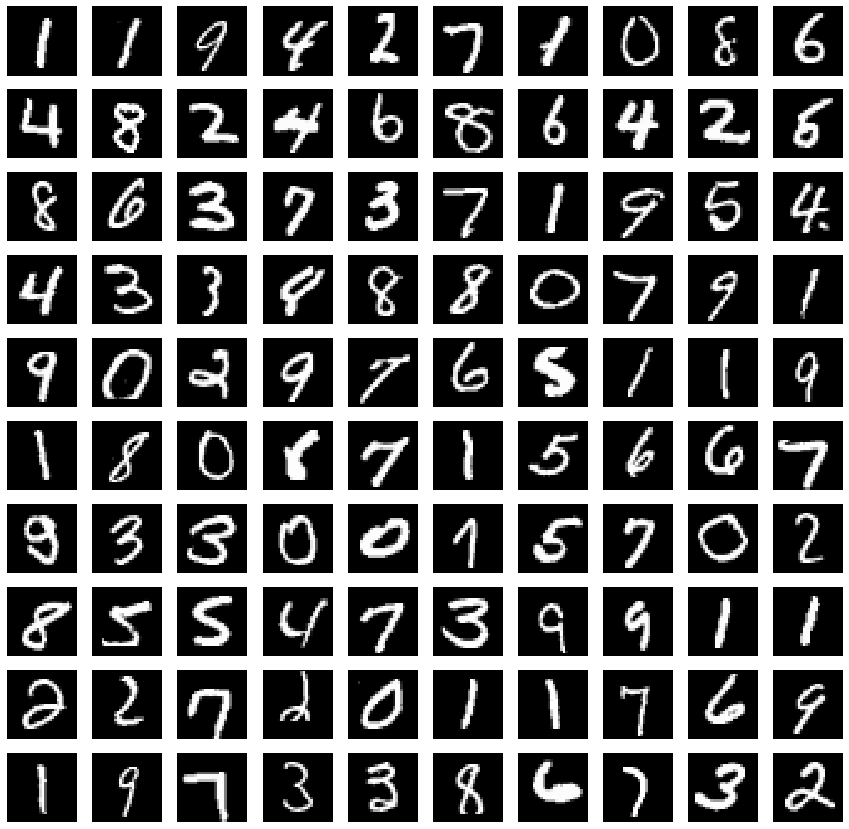

In [0]:
fig, ax = plt.subplots(10, 10, figsize=(15, 15))
p = np.random.permutation(X_train.shape[0])
for i in range(10):
  for j in range(10):
    ax[i][j].grid(False)
    ax[i][j].set_xticks([])
    ax[i][j].set_yticks([])
    ax[i][j].imshow(X_train[p[i*10 + j]], cmap="gray")
plt.show()

Pentru a putea folosi imaginile ca intrare în rețea, ele ar trebui să fie întâi aduse în 2 dimensiuni: $(m, 28, 28) \rightarrow (m, 784)$.

In [0]:
X_train, X_test = X_train.reshape((X_train.shape[0], -1)), X_test.reshape((X_test.shape[0], -1))
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (60000, 784)
X_test:  (10000, 784)


Randomizăm setul de date

In [0]:
p = np.random.permutation(X_train.shape[0])
X_train, y_train = X_train[p], y_train[p]

### 2.2.2 Softmax. Multi-clasificare.

Funcția $softmax : \mathbb{R}^n \rightarrow \mathbb{R}^n$ este definită formal în felul următor:

$softmax(x_1, x_2, \dots, x_n) = \cfrac{1}{\sum_{i=1}^{n} e^{x_i}} \cdot (e^{x_1}, e^{x_2}, \dots, e^{x_n})$

O proprietate importantă a funcției softmax e că normalizează intrările și păstrează ordinea relativă a acestora simultan. În plus, rezultatul funcției softmax are întotdeauna suma 1.0, ceea ce o face perfectă pentru utilizarea în reprezentarea probabilităților.

În cazul rețelelor neuronale, funcția softmax este utilă deoarece produce vectori de probabilități $(p_1, p_2, \dots, p_k)$ pentru oricâte clase (spre deosebire de funcția sigmoidală pentru clasificarea binară, care producea o singură valoare $p$ din care se putea deduce $1 - p$). Astfel, se setează ultimul strat al rețelei ca având $k$ neuroni ($k$ numărul de clase), și se aplică softmax peste rezultat pentru a obține acest vector de probabilități compatibil cu funcția de cost de cross-entropy.

In [0]:
def softmax(x):
  ### TODO: implementare softmax
  sm_x = []
  for line in x:
    sm_x.append(np.exp(line) / np.exp(line).sum())
   
  return np.array(sm_x)

x = np.array([
    [2, 2, 2, 2, 2],
    [1, 2, 3, 4, 5],
    [1, 1, 2, 1, 1],
    [0.1, 0.2, 0.5, 0.1, 0.1],
    [1.5, 1.73, 0.98, 1.001, 2]
])
example = softmax(x)
for i in range(x.shape[0]):
  print(x[i], ' ----> ', example[i])

[2. 2. 2. 2. 2.]  ---->  [0.2 0.2 0.2 0.2 0.2]
[1. 2. 3. 4. 5.]  ---->  [0.01165623 0.03168492 0.08612854 0.23412166 0.63640865]
[1. 1. 2. 1. 1.]  ---->  [0.14884758 0.14884758 0.40460968 0.14884758 0.14884758]
[0.1 0.2 0.5 0.1 0.1]  ---->  [0.17866728 0.19745789 0.26654027 0.17866728 0.17866728]
[1.5   1.73  0.98  1.001 2.   ]  ---->  [0.19573381 0.24635058 0.11636777 0.11883734 0.3227105 ]


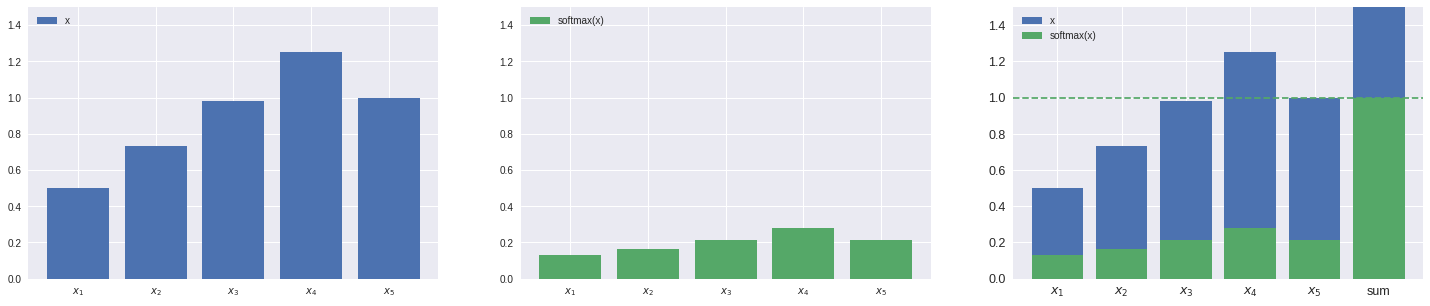

In [0]:
x = [0.5, 0.73, 0.98, 1.25, 1.0]
result = softmax([x]).reshape((-1,))
fig, ax = plt.subplots(1, 3, figsize=(25, 5))
ax[0].bar(np.arange(5), x, color="C0", label="x")
ax[0].legend(loc="upper left")
ax[1].bar(np.arange(5), result, color="C1", label="softmax(x)")
ax[1].legend(loc="upper left")
ax[2].bar(np.arange(5), x, color="C0", label="x")
ax[2].bar(np.arange(5), softmax([x]).reshape((-1,)), color="C1", label="softmax(x)")
ax[2].bar([5], [np.sum(x)], color="C0")
ax[2].bar([5], [np.sum(result)], color="C1")
ax[2].axhline(np.sum(result), linestyle="--", color="C1")
ax[2].legend(loc="upper left")
for i in range(3): 
  ax[i].set_xticks(np.arange(5))
  ax[i].set_xticklabels(["$x_%d$" % (i+1) for i in range(5)])
  ax[i].set_ylim([0.0, 1.5])
ax[2].set_xticks(np.arange(6))
ax[2].set_xticklabels(["$x_%d$" % (i+1) for i in range(5)] + ["sum"])
plt.tick_params(axis='both', which='major', labelsize=12.5)
plt.show()

Derivata funcției softmax nu poate fi exprimată complet decât cu o matrice Jacobiană de derivate parțiale:

$
x \in \mathbb{R}^n, softmax(x) = y \in \mathbb{R}^n \\
J = 
\begin{bmatrix}
  \frac{\partial y_1}{\partial x_1} & \frac{\partial y_1}{x_2} & \dots & \frac{\partial y_1}{x_n} \\
  \frac{\partial y_2}{\partial x_1} & \frac{\partial y_2}{x_2} & \dots & \frac{\partial y_2}{x_n} \\
  \dots & \dots & \dots & \dots \\
  \frac{\partial y_n}{\partial x_1} & \frac{\partial y_n}{x_2} & \dots & \frac{\partial y_n}{x_n} 
\end{bmatrix}
$

$L(y, \hat{y}) = crossentropy(y, y_k) = \cfrac{1}{m} \cdot \displaystyle\sum_{i=1}^{m}\displaystyle\sum_{j=1}^{k} -y^{(i)}_k \cdot ln(\hat{y}^{(i)}_k)$, $y \in \{0, 1\}^k$, $\hat{y} \in [0, 1]^k$, $k$ clase, conform definiției one-hot encoding de la începutul laboratorului.

Vom lua $\cfrac{\partial L(y^{(i)}, \hat{y}^{(i)})}{\partial z^{(i)}_L} = \hat{y}^{(i)} - y^{(i)}$, unde $z^{(i)}_L \in \mathbb{R}^k$ este rezultatul vectorial al ultimului strat și totodată intrarea funcției de softmax: $\hat{y}^{(i)} = softmax(z^{(i)}_L)$ ([explicație](https://deepnotes.io/softmax-crossentropy))

Pentru activare, vom folosi de data aceasta ReLU în loc de funcția sigmoidă:

In [0]:
W1 = np.random.normal(0, 0.1, size=(784, 32))
W2 = np.random.normal(0, 0.1, size=(32, 64))
W3 = np.random.normal(0, 0.1, size=(64, 10))

def train(X, y, W1, W2, W3, learning_rate=1e-3):
  m, n = X.shape
  
  z1 = X.dot(W1)
  a1 = relu(z1)
  
  z2 = a1.dot(W2)
  a2 = relu(z2)
  
  z3 = a2.dot(W3)
  y_hat = softmax(z3)
  
  loss = np.mean(np.sum(-y * np.log(y_hat), axis=1))
  
  # Derivata cross-entropy fata de logits (intrarile functiei de softmax), forma prescurtata
  grad_3 = 1/m * (y_hat - y)
  ### TODO
  grad_2 = grad_3.dot(W3.T)
  grad_1 = grad_2.dot(W2.T)
  
  grad_W3 = a2.T.dot(grad_3)
  grad_W2 = a1.T.dot(grad_2)
  grad_W1 = X.T.dot(grad_1)
  
  W3 -= learning_rate * grad_W3
  W2 -= learning_rate * grad_W2
  W1 -= learning_rate * grad_W1
  
  return loss

for i in range(100):
  losses = []
  for j in range(0, X_train.shape[0], 32):
    loss = train(X_train[j:j+32], y_train[j:j+32], W1, W2, W3)
    losses.append(loss)
  print(np.mean(losses))

2.1929191143391003
1.8713688491871632
1.3611681577270893
0.9443663394802235
0.7316853338627807
0.6213656342225994
0.5549473534609904
0.5099056471320383
0.47695795189584167
0.4516312223484508
0.43142556328797305
0.4148135248824502
0.40080492462068906
0.3887343106328016
0.3781043950400343
0.36858486146787706
0.3599565378764126
0.35202627646176204
0.34469274673350664
0.3378790633841841
0.3315252123541434
0.3256049922418646
0.32006020369048116
0.314849162671258
0.309906380526466
0.3052095429790532
0.3007288539415828
0.2964356018458105
0.2923147660059402
0.288355144725242
0.2845647748613669
0.2809331000355093
0.2774280704839599
0.2740387498583367
0.2707607935029984
0.2675799821378295
0.26449462030376253
0.26150686381065236
0.25860805484628036
0.2557918915868661
0.2530521315667342
0.25038061785612353
0.24778924301274055
0.24527518332097212
0.24283002901933148
0.24045555983810532
0.2381505834769348
0.23590938786801888
0.2337266751952314
0.23159548732863225
0.22951778360530176
0.22748863007179

Acuratețea se măsoară ca numărul de exemple clasificate corect din totalul de exemple. Ca metrică, și metricile în general, acuratețea se măsoară pe setul de test. Aici intervine problema overfitting-ului: o diferență semnificativă între metricile pe setul de antrenare și aceleași metrici pe setul de test indică overfitting.

In [0]:
a1 = relu(X_test.dot(W1))
a2 = relu(a1.dot(W2))
y_hat = softmax(a2.dot(W3))
pred = np.argmax(y_hat, axis=1)
pred_true = np.argmax(y_test, axis=1)
accuracy = np.mean(pred == pred_true)
print(accuracy)

0.9464


Acuratețea pe setul de antrenare:

In [0]:
a1 = relu(X_train[:10000].dot(W1))
a2 = relu(a1.dot(W2))
y_hat = softmax(a2.dot(W3))
pred = np.argmax(y_hat, axis=1)
pred_true = np.argmax(y_train[:10000], axis=1)
accuracy = np.mean(pred == pred_true)
print(accuracy)

0.9517


Ideal, cele două sunt simultan mari și apropiate.

Vizualizarea câtorva predicții:

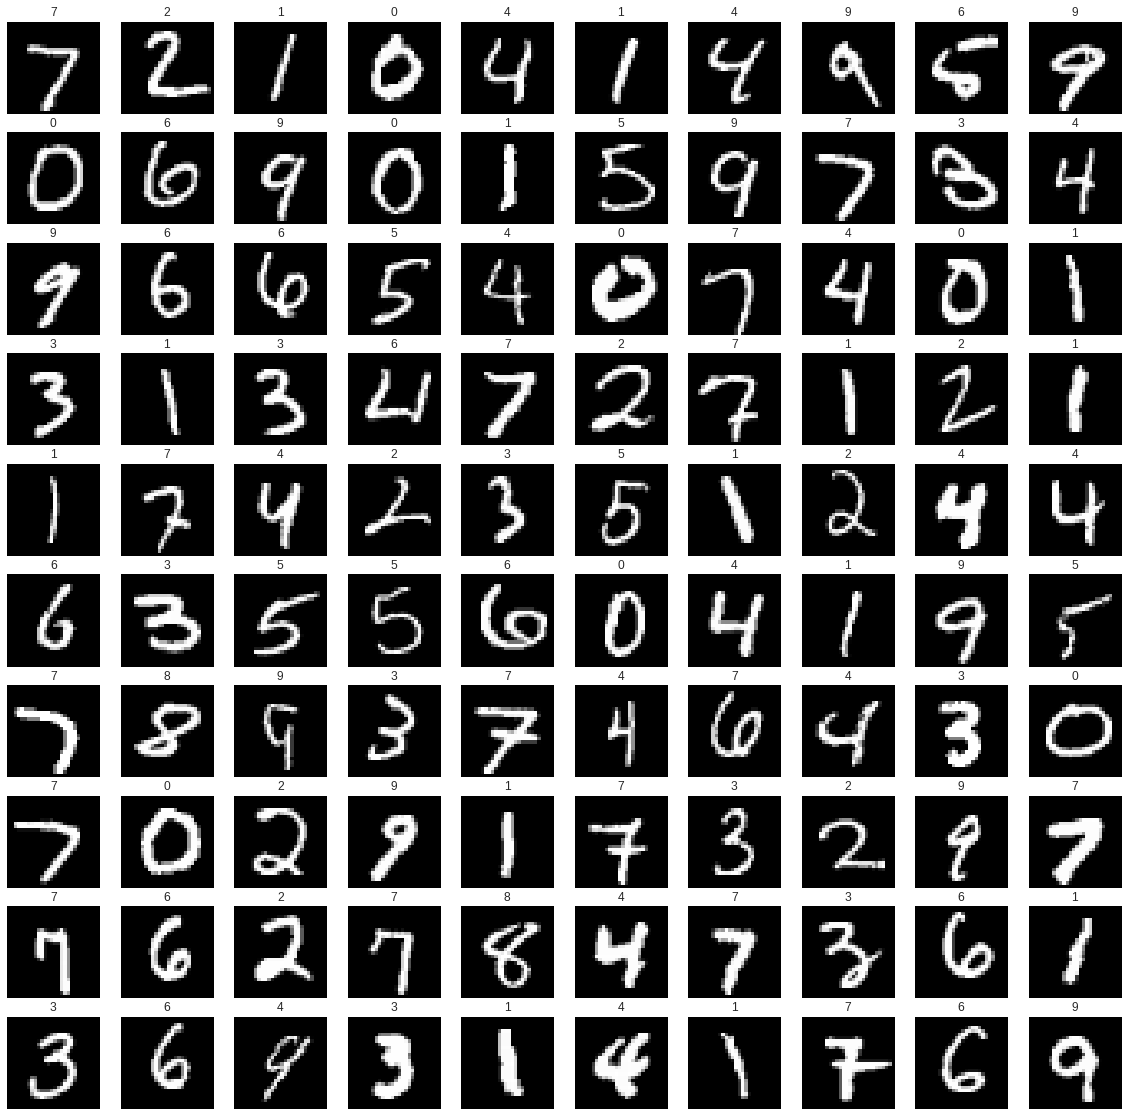

In [0]:
fig, ax = plt.subplots(10, 10, figsize=(20, 20))
for i in range(10):
  for j in range(10):
    ax[i][j].grid(False)
    ax[i][j].set_xticks([])
    ax[i][j].set_yticks([])
    ax[i][j].imshow(X_test[i*10 + j].reshape(28, 28), cmap="gray")
    ax[i][j].set_title(pred[i*10 + j])
plt.show()

### 2.2.3 API

In [0]:
def identity(x):
  return x

def identity_d(x):
  return np.ones(x.shape)

def cross_entropy(y, y_hat):
  return np.mean(np.sum(-y * np.log(y_hat), axis=1))

class Network:
  
  def __init__(self, input_size):
    self.input_size = input_size
    self.layers = []
    
  def add_layer(self, units, activation=identity, activation_d=identity_d):
    if len(self.layers) == 0:
      input_size = self.input_size
    else:
      input_size = self.layers[-1]["W"].shape[1]
    self.layers.append({
        "W": np.random.normal(0.0, 0.01, size=(input_size, units)),
        "b": np.ones((units,)),
        "activation": activation,
        "activation_d": activation_d
    })
    
  def add_output(self, num_classes):
    if len(self.layers) == 0:
      input_size = self.input_size
    else:
      input_size = self.layers[-1]["W"].shape[1]
    self.layers.append({
      "W": np.random.normal(0.0, 0.01, size=(input_size, num_classes)),
      "b": np.ones((num_classes,)),
      "activation": identity,
      "activation_d": identity_d
    })
    
  def feedforward(self, X):
    x = X
    for layer in self.layers:
      layer["logits"] = x.dot(layer["W"]) + layer["b"]
      layer["outputs"] = layer["activation"](layer["logits"])
      x = layer["outputs"]
    return x
  
  def backpropagate(self, X, y, learning_rate=1e-3):
    logits = self.feedforward(X)
    y_hat = softmax(logits)
    loss = cross_entropy(y, y_hat)
    for idx, layer in enumerate(reversed(self.layers)):
      i = len(self.layers) - 1 - idx
      if i == len(self.layers) - 1:
        delta = 1/y.shape[0] * (y_hat - y)
      else:
        delta = delta.dot(self.layers[i+1]["W"].T) * layer["activation_d"](layer["logits"])
      if i == 0:
        layer["grad_W"] = X.T.dot(delta)
      else:
        layer["grad_W"] = self.layers[i-1]["outputs"].T.dot(delta)
      layer["grad_b"] = np.sum(delta, axis=0)
    for layer in self.layers:
      layer["W"] -= learning_rate * layer["grad_W"]
      layer["b"] -= learning_rate * layer["grad_b"]
    return loss
  
  def train(self, X, y, learning_rate=1e-3):
    losses = []
    for i in range(0, X.shape[0], 32):
      loss = self.backpropagate(X[i:i+32], y[i:i+32], learning_rate)
      losses.append(loss)
    return np.mean(losses)
  
  def predict(self, X):
    return np.argmax(softmax(self.feedforward(X)), axis=1)

In [0]:
net = Network(input_size=784)
net.add_layer(32, relu, relu_d)
net.add_layer(64, relu, relu_d)
net.add_output(num_classes=10)
for i in range(200):
  print(net.train(X_train, y_train))

2.301684126306088
2.3014800753616083
2.30135000340683
2.301203696826436
2.3010308732965647
2.300816969764273
2.3005397714754072
2.3001629787863647
2.299622895776663
2.2987982858556952
2.297434212541091
2.2949208421387954
2.2895232645890626
2.2751629597455048
2.2252539615471547
2.0653778628567556
1.8561459483787999
1.7108209085867516
1.554164982818022
1.3605656704325508
1.2287601786106306
1.148746897440836
1.0854612977640363
1.020814393379588
0.9418607627366927
0.8500905933640834
0.7728131138000386
0.7204834597328637
0.6837203110112395
0.654839648438897
0.6299723873875663
0.6074601055298874
0.5864560359200892
0.5665557499284979
0.5476871083076496
0.5298260595838535
0.5130149125743946
0.4973023919504388
0.48277469567992065
0.46949746896181255
0.4574729704826772
0.44667384296646295
0.43699370601736554
0.42830724717484775
0.42043830582151986
0.41322533157139374
0.4065513840258676
0.4003197532197555
0.3944693973413633
0.38891022733385194
0.38359188932974136
0.3784887383768802
0.373575270063

In [0]:
print(np.mean(np.argmax(y_test, axis=1) == net.predict(X_test)))

0.9527


### 2.2.4 Metrici

Mai sus am folosit funcția de cost și acuratețea ca metrici. În timp ce funcția de cost mai deservește și un alt rol în rețea, acuratețea este o cuantificare opțională a performanței acesteia. În general, o metrică realizează același lucru: măsoară performanța rețelei pentru problema aleasă.

Pentru clasificarea binară, metrici des întâlnite sunt "accuracy", "precision", "recall"și scorul F1. Toate sunt funcții de 4 valori:

* TP = True Positive = numărul de exemple prezise ca făcând parte din clasa pozitivă sau "1", care făceau parte și în realitate din clasa pozitivă sau "1"
* TN = True Negative = numărul de exemple prezise ca făcând parte din clasa negativă sau "0", care făceau parte și în realitate din clasa negativă sau "0"
* FP = False Positive = numărul de exemple prezise ca fiind din clasa pozitivă, care făceau parte în realitate din clasa negativă
* FN = False Negative = numărul de exemple prezise ca fiind din clasa negativă, care făceau parte în realitate din clasa pozitivă

În aceste condiții, cele 4 metrici menționate mai sus se definesc astfel:

* precision: $\cfrac{TP}{TP + FP}$
* recall: $\cfrac{TP}{TP + FN}$
* accuracy: $\cfrac{TP + TN}{TP + TN + FP + FN}$
* F1 score: $2 \cdot \cfrac{precision \cdot recall}{precision + recall}$

Este foarte posibil ca o metrică să aibă un rezultat bun în timp ce altele indică o performanță scăzută; de aceea este important ca mai multe metrici să fie luate în calcul. 

Aceste metrici se extind la mai multe clase într-o manieră "one-vs-all": se ia fiecare pereche de clase $(k_1, k_2)$ și se măsoară luând clasă pozitivă $k_1$ și clasă negativă $k_2$ și/sau vice-versa. Rezultatul va fi o matrice simetrică pentru fiecare metrică, în loc de o valoare scalară. Se poate folosi apoi media acestor valori ș.a.m.d.

Puteți implementa metricile voi sau le puteți folosi pe cele deja implementate în scikit learn:

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = [1, 3, 3, 1, 2, 4, 3, 1]
y_pred = [1, 2, 3, 1, 1, 4, 3, 1]

print('accuracy: ', accuracy_score(y_true, y_pred))
print('precision: ', precision_score(y_true, y_pred, average=None))
print('recall: ', recall_score(y_true, y_pred, average=None))
print('f1 score: ', f1_score(y_true, y_pred, average=None))

accuracy:  0.75
precision:  [0.75 0.   1.   1.  ]
recall:  [1.         0.         0.66666667 1.        ]
f1 score:  [0.85714286 0.         0.8        1.        ]


### Temă

1. Plotați graficul funcției de cost în funcție de epoca de antrenare (Hint: `plt.plot(x, losses)`).
2. Împărțiți setul de antrenare în două: un set nou de antrenare și un set de validare (Hint: randomizați `X_train`, alegeți un index $i$ și luați `X_train[:i]` și `X_train[i:]`). Antrenați numai pe setul nou de antrenare. Plotați graficul acurateții de validare ca funcție de epocă.
3. Modificați rata de învățare. Plotați și comparați evoluția funcției de cost pe setul de antrenare pentru rate diferite (Hint: încercați valori ca 10, 1.0, 0.1, 0.000001).
4. Adăugați regularizare. Încercați valori diferite pentru $\lambda$. Plotați și comparați evoluția funcției de cost pe setul de antrenare pentru valori diferite (Hint: se adună la funcția de cost un $\frac{\lambda}{m} \cdot \sum ||W^l||$)
5. Încercați cel puțin 3 arhitecturi diferite (care obțin totuși rezultate acceptabile) și comparați rezultatele. Luați în considerare hiperparametrii, costul și mai multe metrici. Nu trebuie ca toate 3 să fie performante, contează mai mult diferența dintre ele și motivul pentru care performanța diferă. Exemple de hiperparametri care ar trebui luați în considerare: numărul de straturi, numărul de neuroni per strat, funcțiile de activare, rata de învățare, cu sau fără regularizare etc. Încercați arhitecturi cât mai diferite.
6. Rezolvați o problemă de regresie cu o rețea neuronală (va trebui schimbat API-ul și metricile, softmax și cross-entropy nu mai pot fi folosite).

In [0]:
net = Network(input_size=784)
net.add_layer(32, relu, relu_d)
net.add_layer(64, relu, relu_d)
net.add_output(num_classes=10)
losses = []
for i in range(200):
  loss = net.train(X_train, y_train)
  losses.append(loss)
  print(str(i/200*100) + '%')

plt.plot(range(200),losses)